WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Mean of both groups: 0.7589700781741396
Standard Deviation of both groups: 0.2314658145638596


/opt/anaconda3/envs/3.11.8/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:701: UserWarning: Optimization Warning: The Op betainc does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/opt/anaconda3/envs/3.11.8/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:701: UserWarning: Optimization Warning: The Op betainc does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
/opt/anaconda3/envs/3.11.8/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:701: UserWarning: Optimization Warning: The Op betainc does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
/opt/anaconda3/envs/3.11.8/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:701: UserWarning: Optimization Warning: The Op 

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 124 seconds.


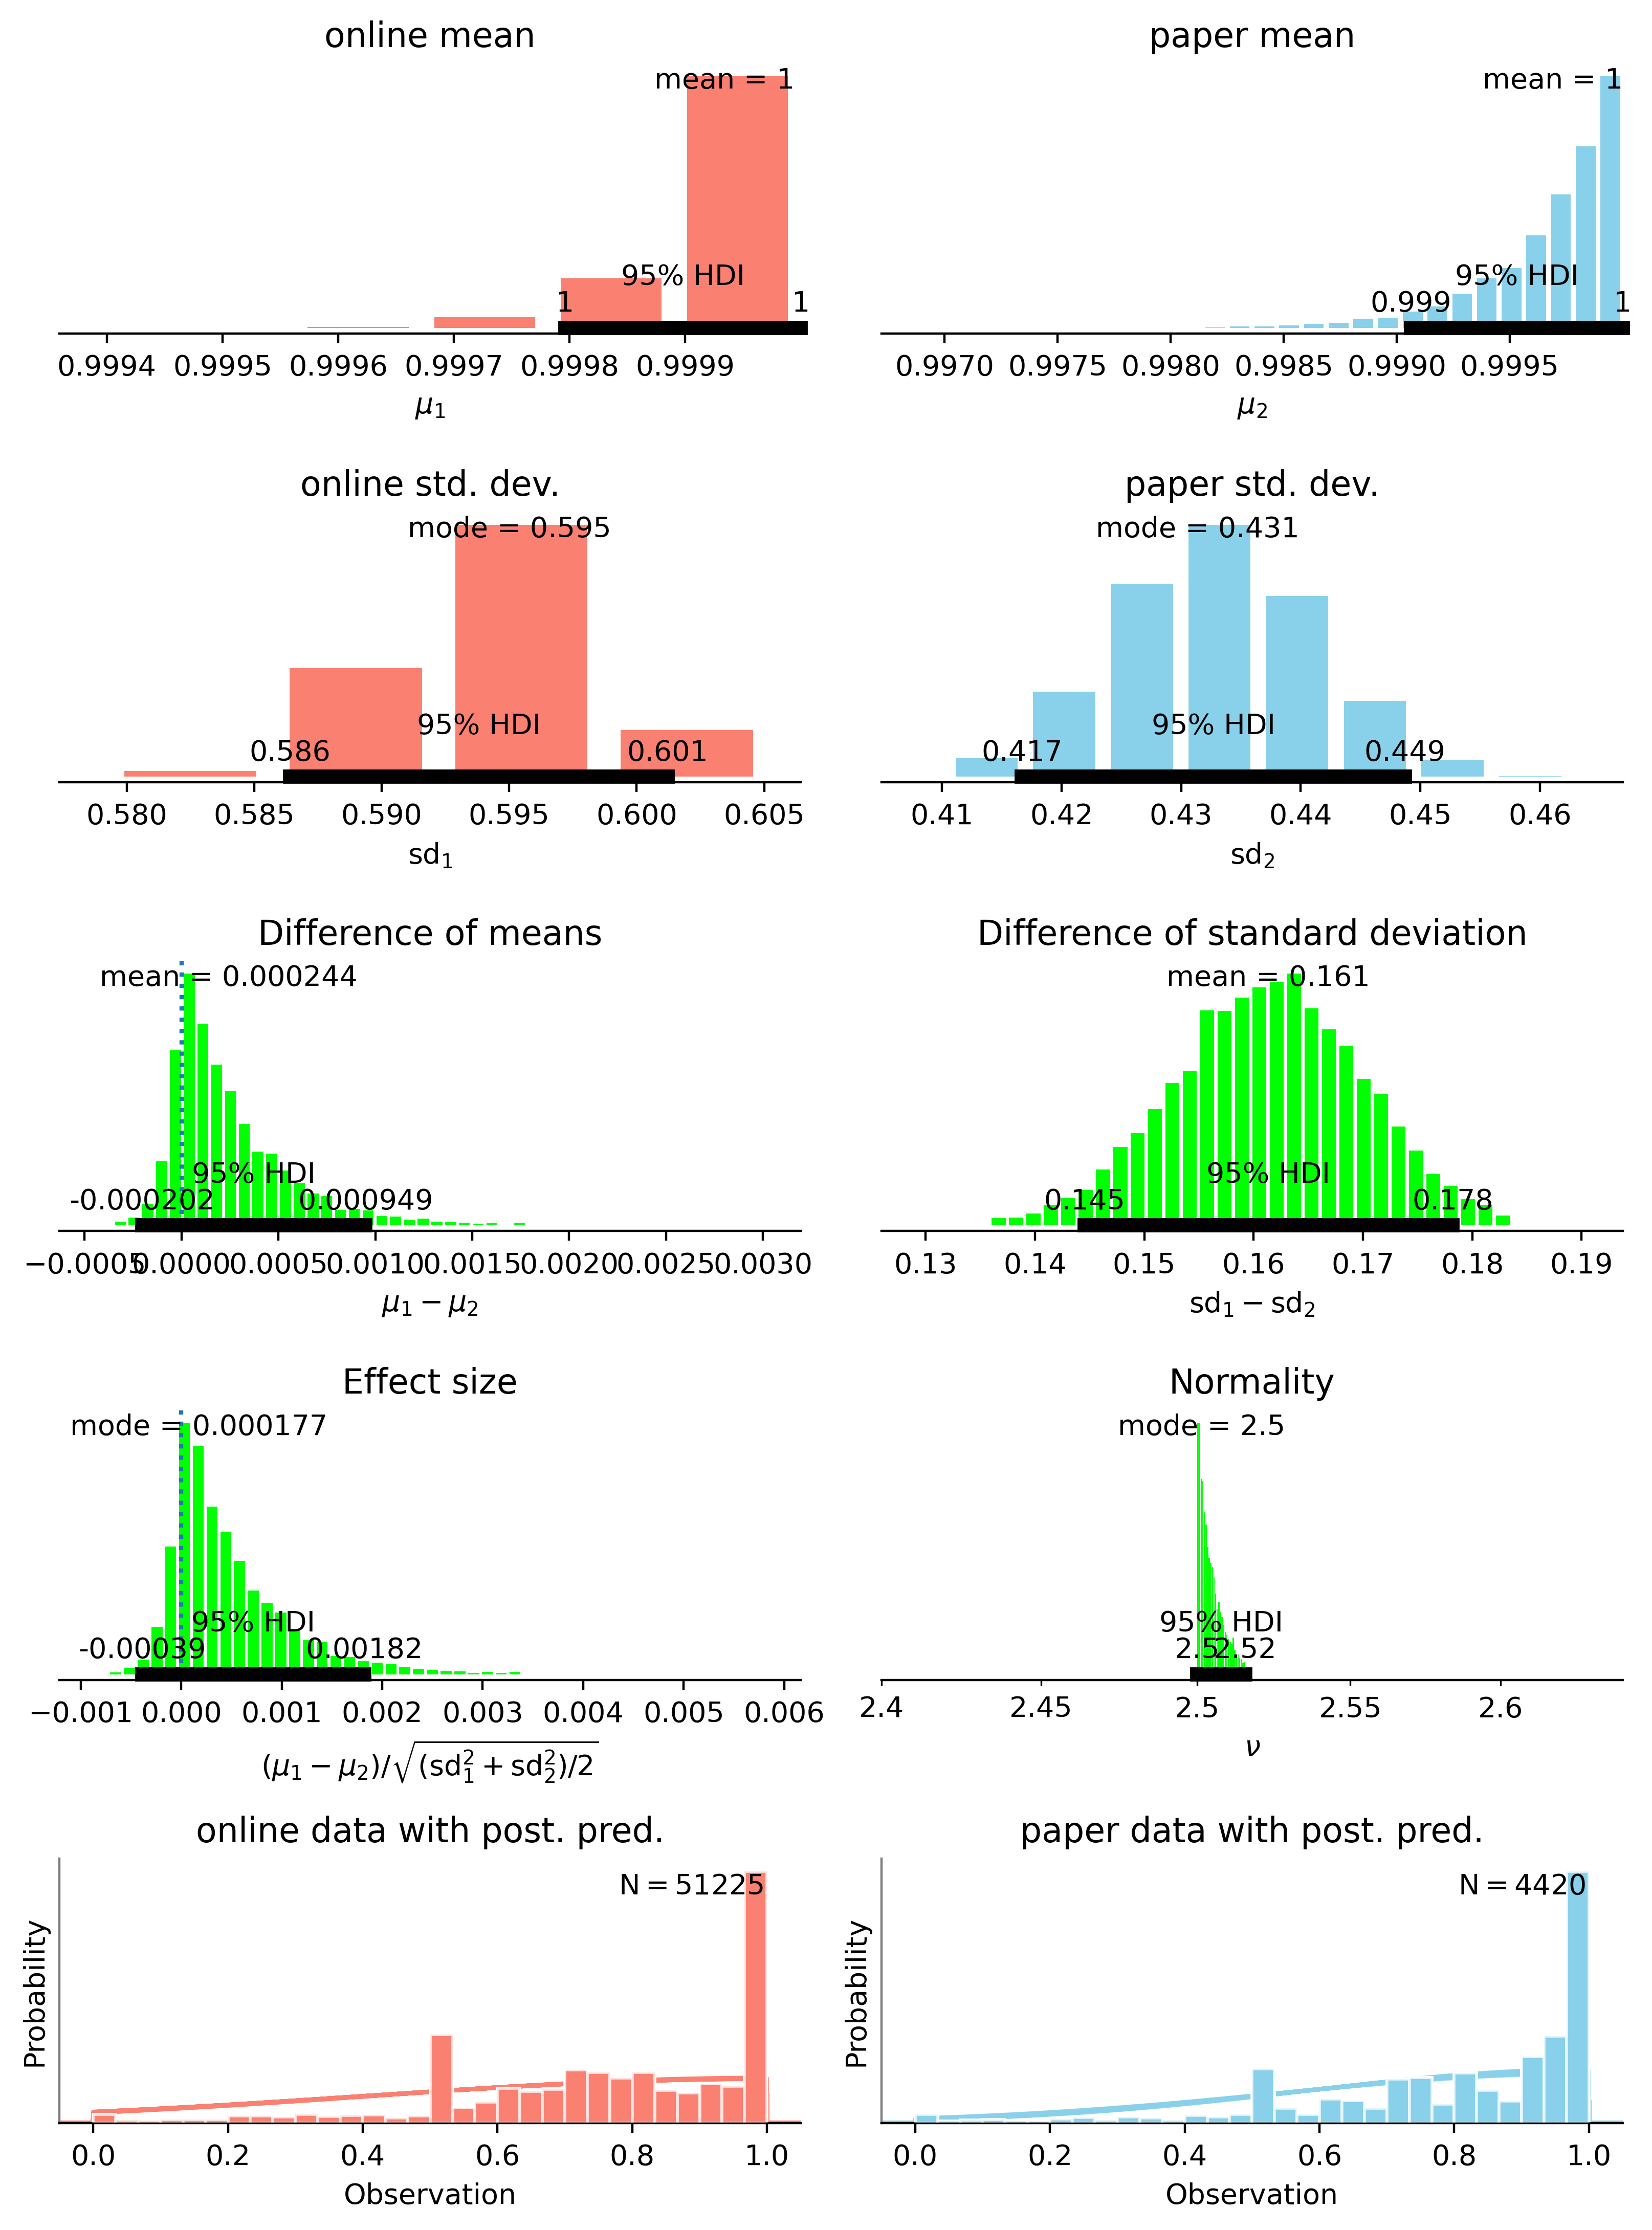

In [1]:
from bayes_test import BayesianHypothesisTestTruncStudentT
import pandas as pd
import numpy as np

draws = 2000

online = np.load('online_distinctiveness.npy')

paper = np.load('paper_distinctiveness.npy')


df1 = pd.DataFrame({'value' : paper})
df2 = pd.DataFrame({'value' : online})
df1['del_type'] = 'paper'
df2['del_type'] = 'online'

df = pd.concat([df1,df2])

study_test = BayesianHypothesisTestTruncStudentT(df=df,
                                   group1_name='online',
                                   group2_name='paper',
                                   value_column='value',
                                   category_column='del_type',
                                   lower=0,
                                   upper=1)
study_test.run_model(draws)
study_test.plot_results()

In [2]:
# This will computer various effect sizes
study_test.cliff_delta()
study_test.non_overlap_effect_size()
study_test.divergence_effect_size()
study_test.value_storage

Sampling: [Group 1 data, Group 2 data]


{'mean_group1': {'mean': 0.9999341556964034,
  'hdi_min': 0.9997963410994934,
  'hdi_max': 0.9999999625912953},
 'mean_group2': {'mean': 0.999690955504636,
  'hdi_min': 0.9990630121662404,
  'hdi_max': 0.9999999426650512},
 'std_group1': {'mode': 0.5950072546231375,
  'hdi_min': 0.586412782590549,
  'hdi_max': 0.6012089122561941},
 'std_group2': {'mode': 0.4314002487023577,
  'hdi_min': 0.4166955974717845,
  'hdi_max': 0.4487121319865605},
 'diff_means': {'mean': 0.00024363338880371374,
  'hdi_min': -0.00020229145255890035,
  'hdi_max': 0.0009494297278263009},
 'diff_stds': {'mean': 0.1613187108298457,
  'hdi_min': 0.14452485775794738,
  'hdi_max': 0.1782018205400836},
 'Effect size': {'mode': 0.00017739488821381932,
  'hdi_min': -0.0003895455177359751,
  'hdi_max': 0.0018214219619401674},
 'Normality': {'mode': 2.501342142363722,
  'hdi_min': 2.5000017285283342,
  'hdi_max': 2.515590364454236},
 'cliff_delta': {'cliff_delta': 0.576677162},
 'non_overlap_effect_size': {'non_overlap_eff